In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# This constant limits the number of rows read in from the big CSV file.
# Set to None if you want to read the whole thing
LIMIT = None

In [48]:
path = "../data/pecanstreet/15minute_data_austin/"

In [49]:
# read the 15 minute data file for California
all_data = pd.read_csv(path+"15minute_data_austin.csv", engine='python', encoding="ISO-8859-1",
                                  parse_dates=['local_15min'], index_col=['local_15min'],
                                  usecols=['dataid', 'local_15min', 'grid'],
                                  nrows=LIMIT)

In [50]:
# read in the metadata file, skip the 2nd row because it has the comments further describing the headers
metadata=pd.read_csv(path+"metadata.csv", engine='python', encoding="ISO-8859-1", skiprows=[1])

In [74]:
# filter down to our houses of interest. Active, Austin-based, has complete data, and has the grid circuit
dataids = metadata[metadata.active_record.eq('yes') &
                   metadata.city.eq('Austin') &
                   metadata.egauge_1min_data_availability.isin(['100%', '99%', '98%', '97%','96%','95%']) &
                   metadata.grid.eq('yes')]

In [75]:
# filter down to the dataids we're interested in
filt = all_data[all_data.dataid.isin(dataids.dataid)]

filt.index = pd.to_datetime(filt.index, utc=True, infer_datetime_format=True)
filt = filt.tz_convert('US/Central')

In [76]:
print(filt.describe())

              dataid           grid
count  558367.000000  555685.000000
mean     4799.416565       0.887309
std      2574.876683       1.759743
min       661.000000      -4.873000
25%      3039.000000       0.271000
50%      4373.000000       0.620000
75%      7719.000000       1.562000
max      9922.000000      15.522000


In [77]:
filt

,dataid,grid
local_15min,,
2018-11-21 15:15:00-06:00,661,0.124
2018-11-21 15:30:00-06:00,661,0.251
2018-11-21 15:45:00-06:00,661,0.419
2018-11-21 16:00:00-06:00,661,0.833
2018-11-21 16:15:00-06:00,661,1.105
...,...,...
2018-12-31 22:45:00-06:00,9922,1.238
2018-12-31 23:00:00-06:00,9922,1.211
2018-12-31 23:15:00-06:00,9922,1.045


In [64]:
# group the data by days and take the mean of those
days = filt.groupby(pd.Grouper(freq='D')).mean()
hours = filt.groupby(pd.Grouper(freq='H')).mean()

In [65]:
# convert from kW to kWh
days['grid_kwh'] = days['grid'].apply(lambda x: x * 24)

In [66]:
print(days.describe())

            dataid        grid    grid_kwh
count   365.000000  365.000000  365.000000
mean   4590.069356    0.863589   20.726131
std      48.221271    0.518294   12.439060
min    4428.975000   -0.107394   -2.577446
25%    4585.642857    0.407384    9.777225
50%    4585.642857    0.848360   20.360643
75%    4585.642857    1.259249   30.221982
max    5092.363636    2.214606   53.150554


In [67]:
print(hours.describe())

            dataid         grid
count  8759.000000  8759.000000
mean   4590.240149     0.863839
std      53.011366     1.068862
min    4344.615385    -2.550982
25%    4585.642857     0.477973
50%    4585.642857     0.842000
75%    4585.642857     1.377375
max    5160.545455     4.175768


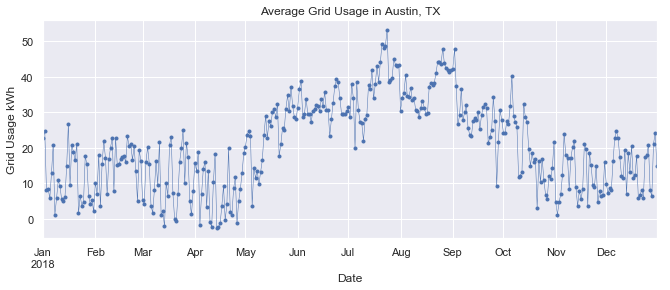

In [59]:
# create the plot
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize': (11, 4)})
solar_plot = days['grid_kwh'].plot(linewidth=0.5, marker='.')
solar_plot.set_xlabel('Date')
solar_plot.set_ylabel('Grid Usage kWh')
solar_plot.set_title('Average Grid Usage in Austin, TX')

# display the plot
plt.show()

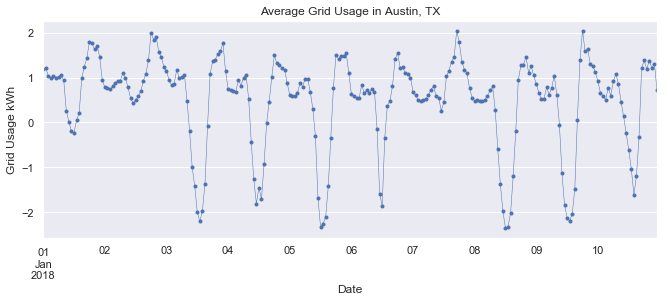

In [69]:
# create the plot
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize': (11, 4)})
solar_plot = hours['grid'][:240].plot(linewidth=0.5, marker='.')
solar_plot.set_xlabel('Date')
solar_plot.set_ylabel('Grid Usage kWh')
solar_plot.set_title('Average Grid Usage in Austin, TX')

# display the plot
plt.show()

In [62]:
filt.groupby(pd.Grouper(freq='H')).mean()

,dataid,grid
local_15min,,
2018-01-01 00:00:00-06:00,4585.642857,1.188636
2018-01-01 01:00:00-06:00,4585.642857,1.218070
2018-01-01 02:00:00-06:00,4585.642857,1.034154
2018-01-01 03:00:00-06:00,4585.642857,0.981958
2018-01-01 04:00:00-06:00,4585.642857,1.034312
...,...,...
2018-12-31 19:00:00-06:00,4571.692308,1.253942
2018-12-31 20:00:00-06:00,4571.692308,1.215442
2018-12-31 21:00:00-06:00,4571.692308,1.309712


In [46]:
all_data

,dataid,grid
local_15min,,
2014-01-01 00:00:00-06:00,3687,1.717
2014-01-01 00:15:00-06:00,3687,1.905
2014-01-01 00:30:00-06:00,3687,1.923
2014-01-01 00:45:00-06:00,3687,1.535
2014-01-01 01:00:00-06:00,3687,1.010
...,...,...
2015-09-30 22:45:00-05:00,6547,0.362
2015-09-30 23:00:00-05:00,6547,0.323
2015-09-30 23:15:00-05:00,6547,0.303


In [43]:
print(filt.describe())

       dataid  grid
count     0.0   0.0
mean      NaN   NaN
std       NaN   NaN
min       NaN   NaN
25%       NaN   NaN
50%       NaN   NaN
75%       NaN   NaN
max       NaN   NaN


In [15]:
df.columns

Index(['dataid', 'local_15min', 'air1', 'air2', 'air3', 'airwindowunit1',
       'aquarium1', 'bathroom1', 'bathroom2', 'bedroom1', 'bedroom2',
       'bedroom3', 'bedroom4', 'bedroom5', 'battery1', 'car1', 'car2',
       'circpump1', 'clotheswasher1', 'clotheswasher_dryg1', 'diningroom1',
       'diningroom2', 'dishwasher1', 'disposal1', 'drye1', 'dryg1', 'freezer1',
       'furnace1', 'furnace2', 'garage1', 'garage2', 'grid', 'heater1',
       'heater2', 'heater3', 'housefan1', 'icemaker1', 'jacuzzi1', 'kitchen1',
       'kitchen2', 'kitchenapp1', 'kitchenapp2', 'lights_plugs1',
       'lights_plugs2', 'lights_plugs3', 'lights_plugs4', 'lights_plugs5',
       'lights_plugs6', 'livingroom1', 'livingroom2', 'microwave1', 'office1',
       'outsidelights_plugs1', 'outsidelights_plugs2', 'oven1', 'oven2',
       'pool1', 'pool2', 'poollight1', 'poolpump1', 'pump1', 'range1',
       'refrigerator1', 'refrigerator2', 'security1', 'sewerpump1', 'shed1',
       'solar', 'solar2', 'sprinkler1

In [18]:
df[df["dataid"]==3687]

,dataid,local_15min,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,3687,2014-01-01 00:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.239,119.769
1,3687,2014-01-01 00:15:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.256,119.628
2,3687,2014-01-01 00:30:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.358,119.859
3,3687,2014-01-01 00:45:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.766,119.985
4,3687,2014-01-01 01:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.844,120.368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35031,3687,2014-12-31 22:45:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.311,119.766
35032,3687,2014-12-31 23:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.694,119.888
35033,3687,2014-12-31 23:15:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.929,119.970
35034,3687,2014-12-31 23:30:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.195,119.873


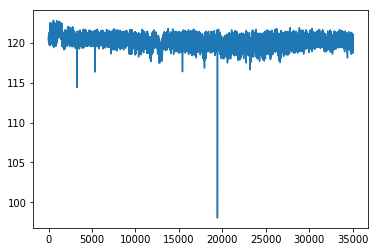

In [23]:
plt.plot(df[df["dataid"]==3687]["leg1v"])

In [20]:
unique_dataid_count = df['dataid'].nunique()

In [21]:
unique_dataid_count

23

In [22]:
unique_dataids = df['dataid'].unique()
unique_dataids

array([3687, 6377, 7062, 8574, 9213,  203, 1450, 1524, 2606, 3864, 7114,
       1731, 4495, 8342, 3938, 5938, 8061, 9775, 4934, 8733, 9612, 9836,
       6547])